In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.preprocessing import (
    MinMaxScaler,
    LabelEncoder,
    OrdinalEncoder,
)

In [7]:
df = pd.read_csv("spaceship_titanic.csv")

In [8]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,NaN,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,NaN,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,NaN,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [9]:
df.info(
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8292 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         1892 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           7699 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [10]:
df.isnull().sum()

PassengerId        0
HomePlanet       401
CryoSleep        217
Cabin           6801
Destination      182
Age              994
VIP              203
RoomService      181
FoodCourt        183
ShoppingMall     208
Spa              183
VRDeck           188
Name             200
Transported        0
dtype: int64

In [11]:
percentage_of_missing_values_per_column = df.isnull().sum() / len(df) * 100

In [12]:
percentage_of_missing_values_per_column = (
    percentage_of_missing_values_per_column.reset_index().rename(
        columns={"index": "column_name", 0: "missing_percentage"}
    )
)

In [13]:
percentage_of_missing_values_per_column

,column_name,missing_percentage
0,PassengerId,0.000000
1,HomePlanet,4.612907
2,CryoSleep,2.496261
3,Cabin,78.235362
4,Destination,2.093639
5,Age,11.434488
6,VIP,2.335212
7,RoomService,2.082135
8,FoodCourt,2.105142
9,ShoppingMall,2.392730


<Axes: >

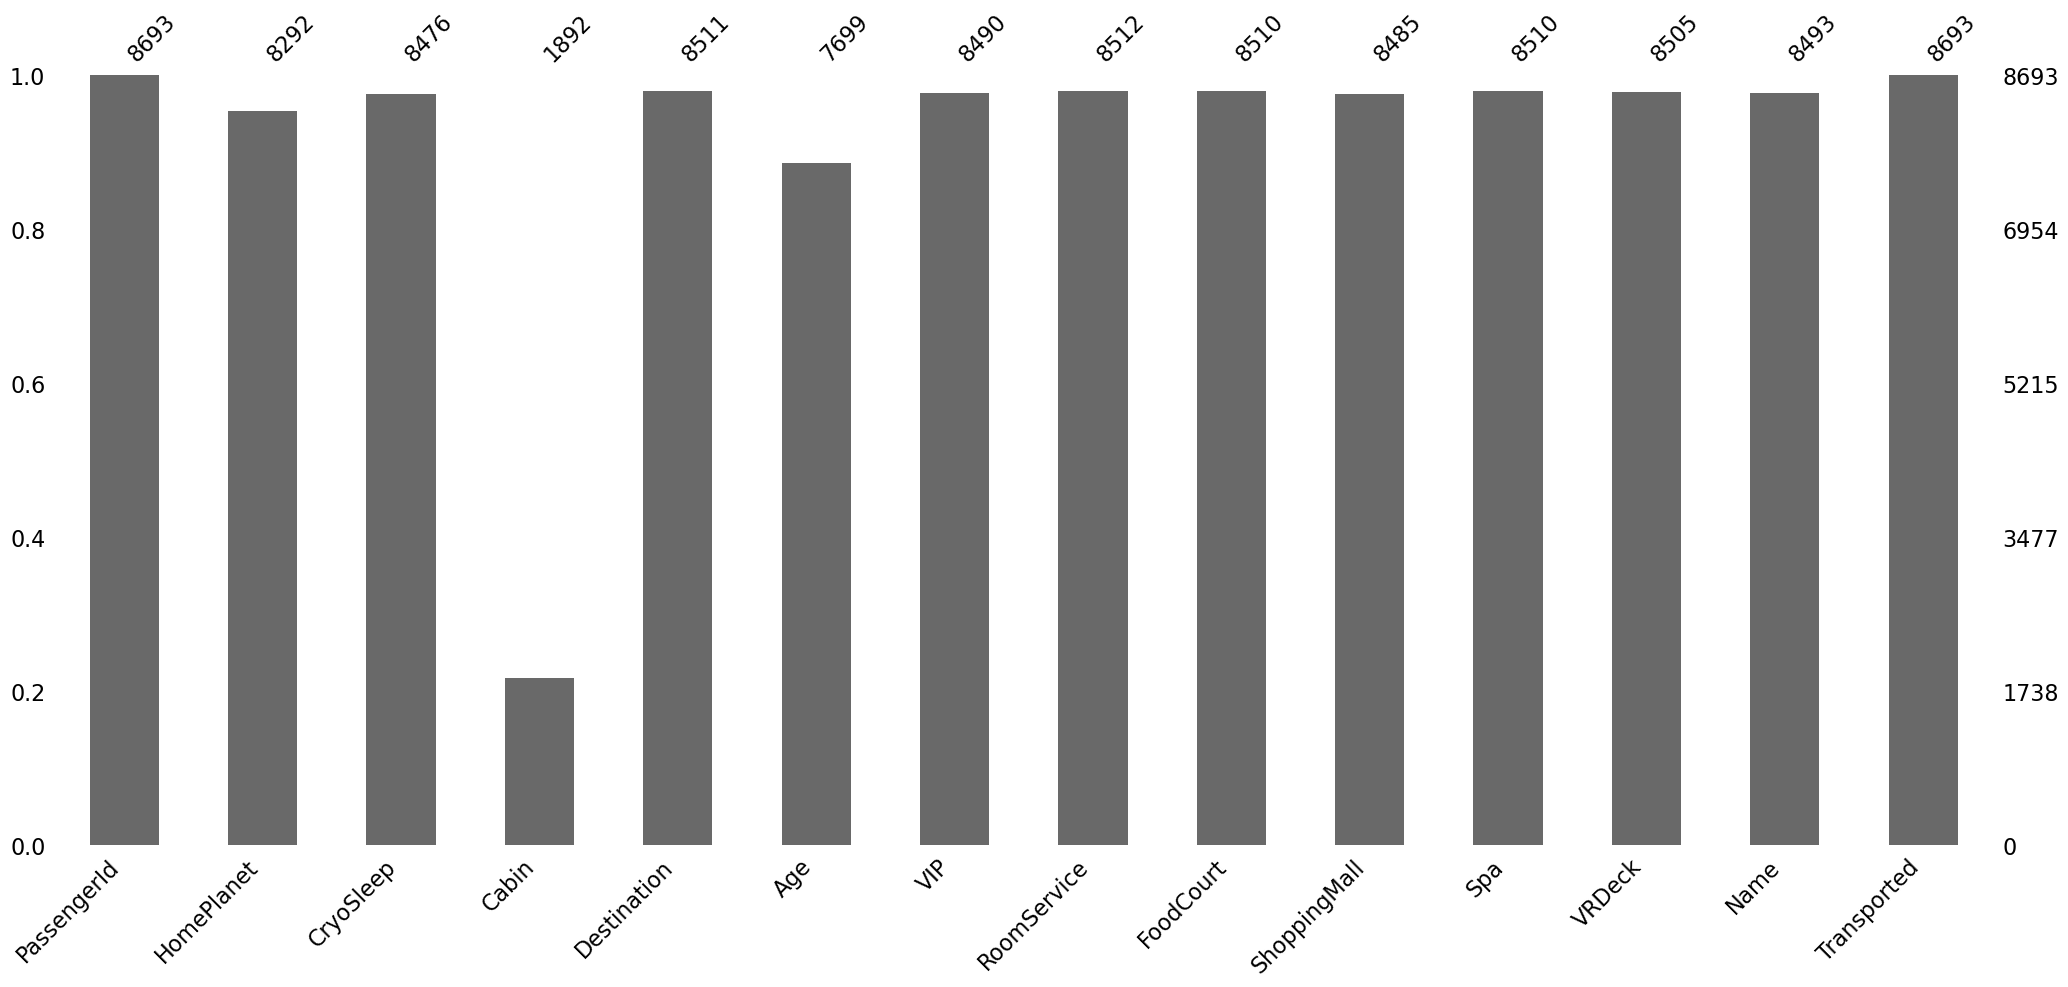

In [14]:
msno.bar(df)

<Axes: >

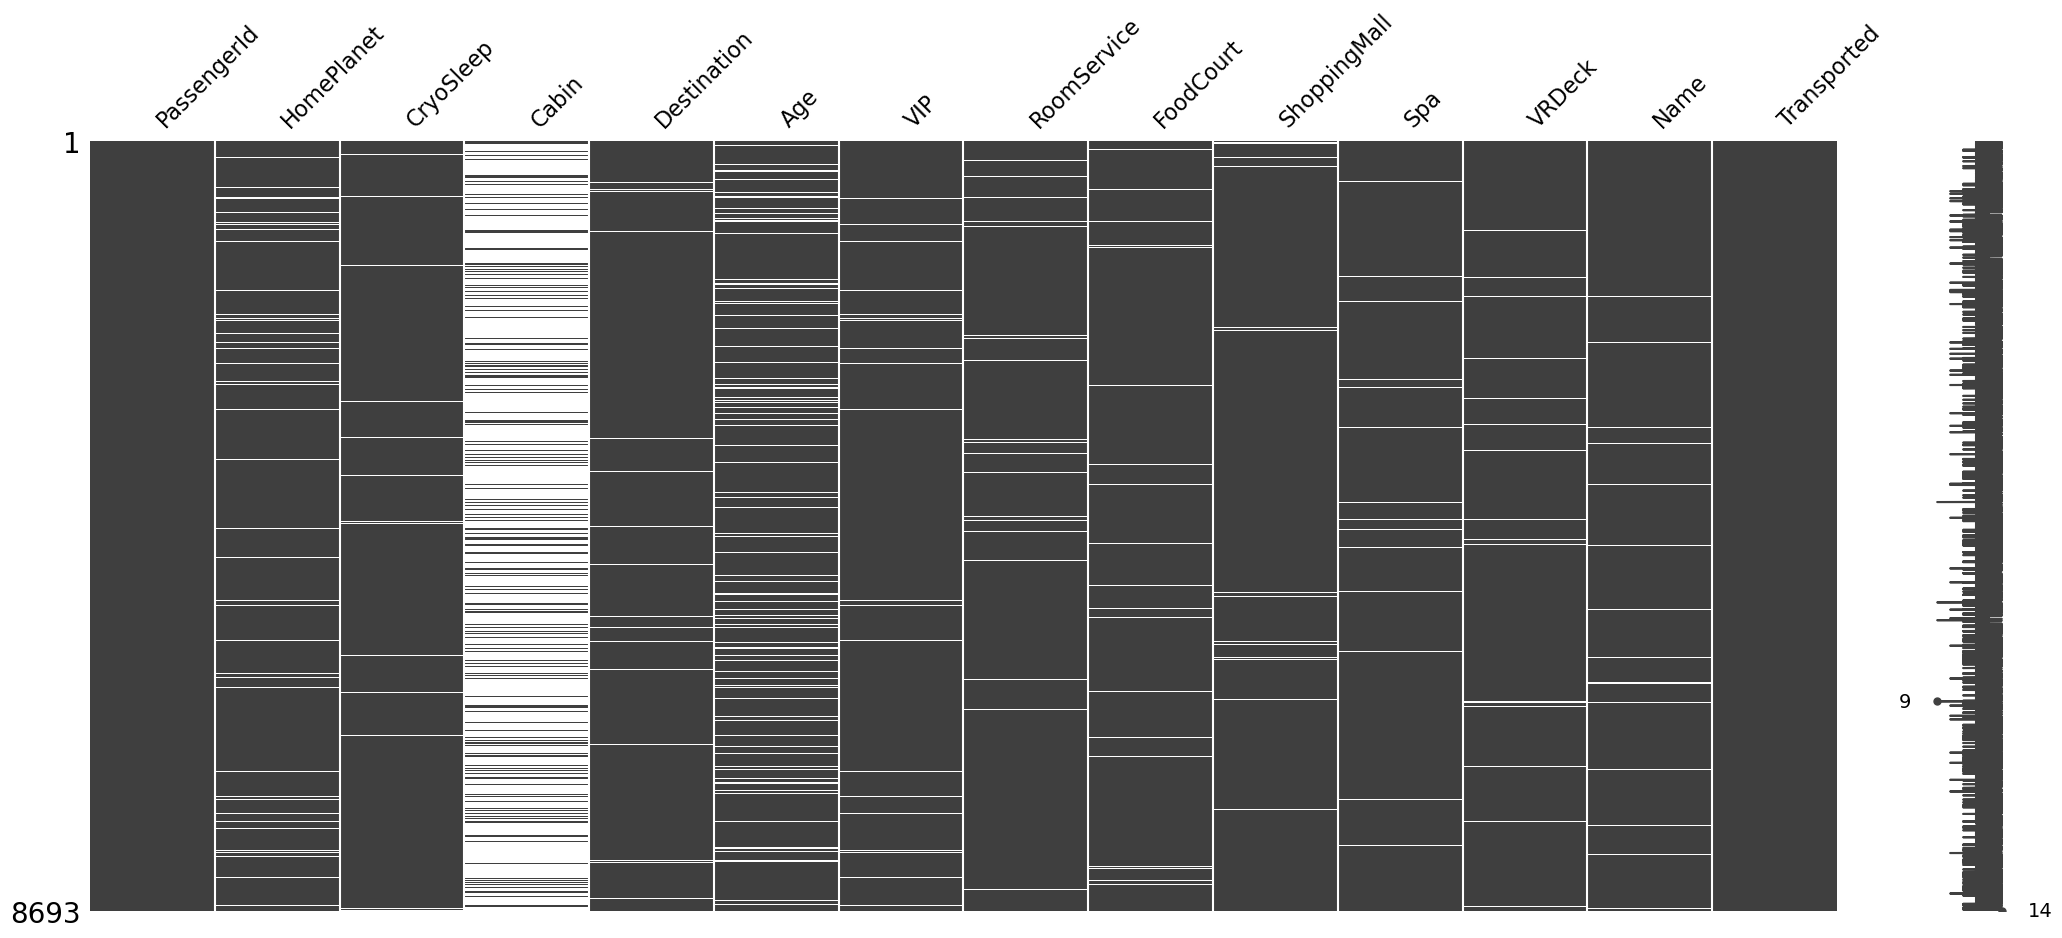

In [15]:
msno.matrix(df)

<Axes: >

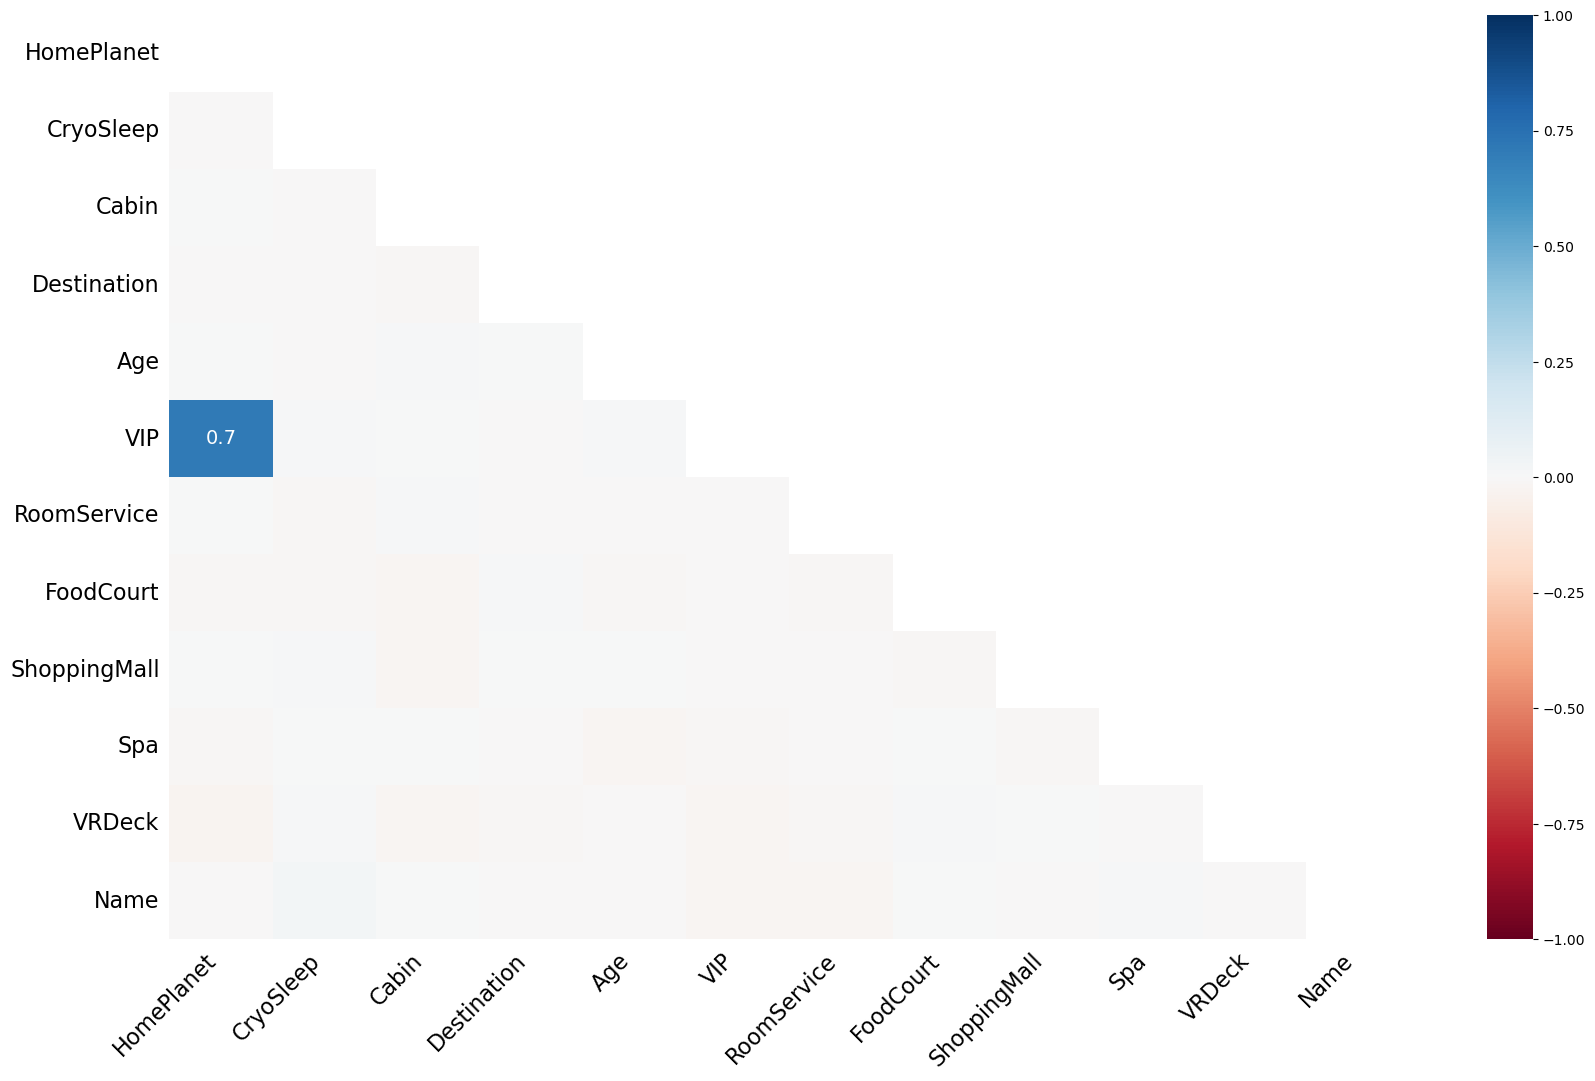

In [16]:
msno.heatmap(df)

<Axes: >

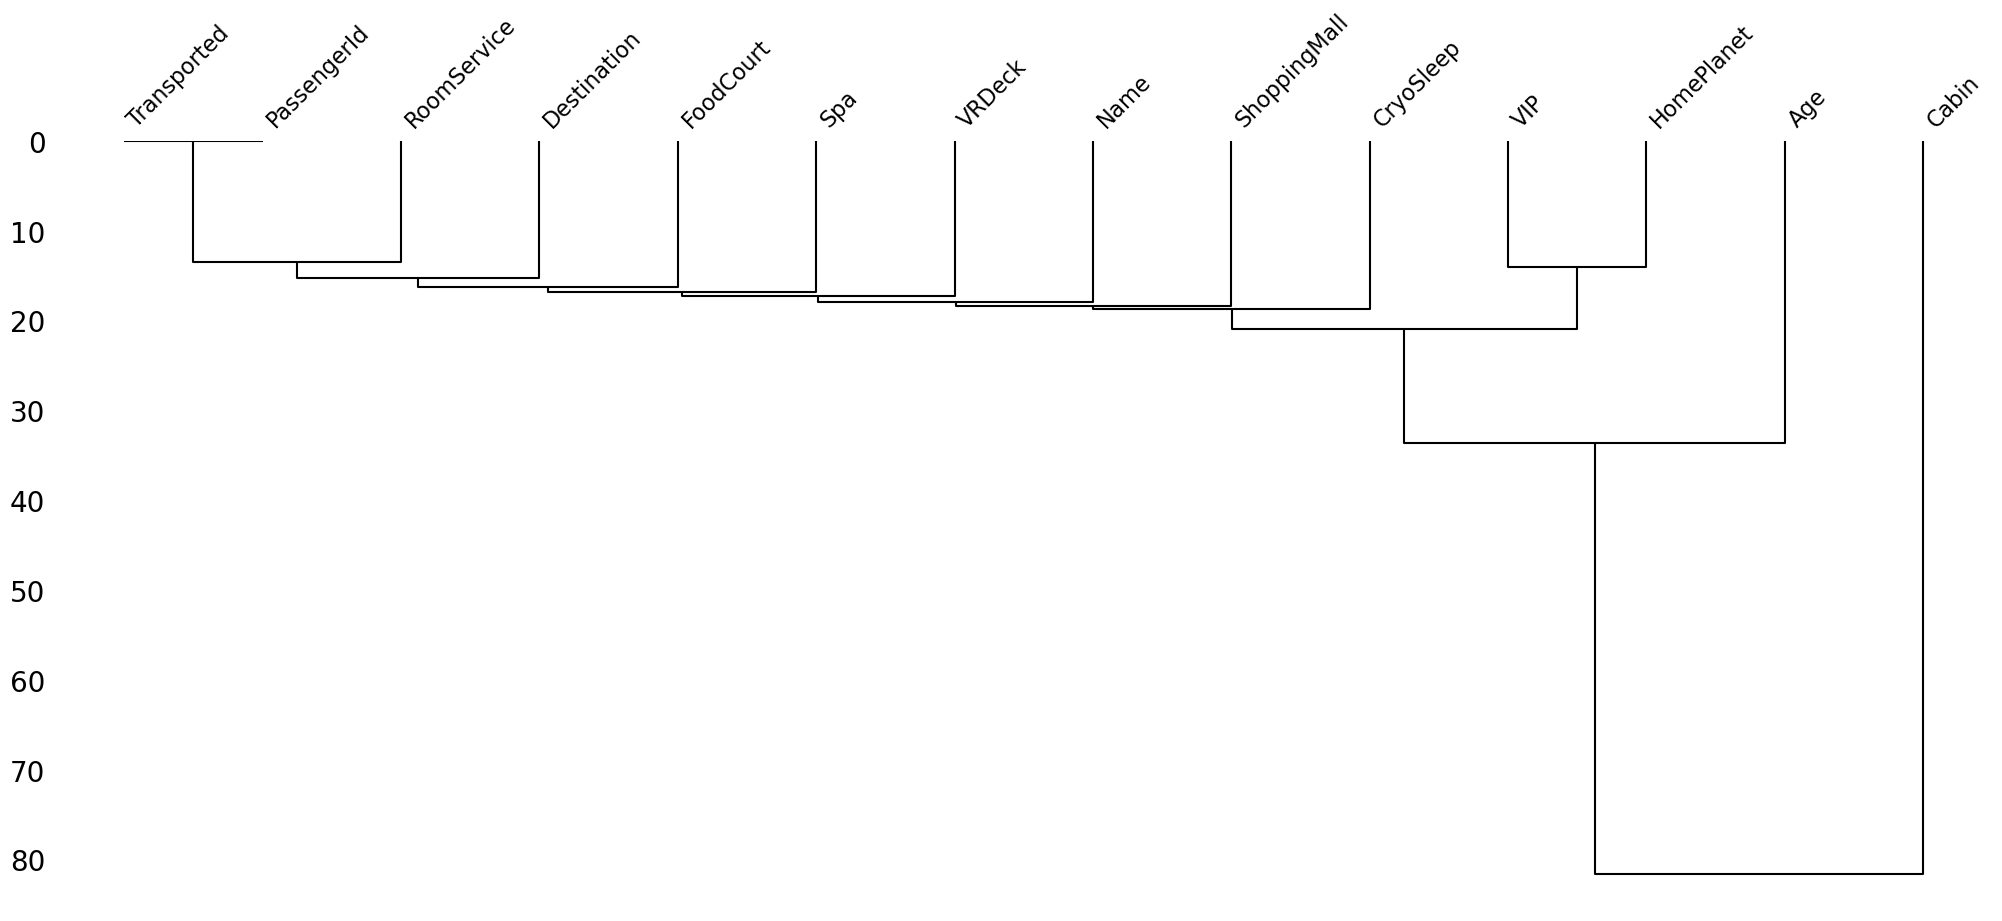

In [17]:
msno.dendrogram(df)

In [18]:
df["Age"].mean().item()

28.798805039615534

In [19]:
df = df.dropna(subset=["RoomService"], axis=0)

In [20]:
df.isnull().sum()

PassengerId        0
HomePlanet       391
CryoSleep        215
Cabin           6655
Destination      179
Age              974
VIP              199
RoomService        0
FoodCourt        181
ShoppingMall     204
Spa              180
VRDeck           186
Name             199
Transported        0
dtype: int64

In [21]:
df.drop(columns=["Cabin"])

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,TRAPPIST-1e,NaN,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,55 Cancri e,NaN,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [22]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,NaN,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,NaN,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,NaN,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [23]:
constant_imputer = SimpleImputer(strategy="constant", fill_value=0)

In [24]:
df["FoodCourt"] = constant_imputer.fit_transform([df["FoodCourt"]])[0]

e:\Anaconda\Lib\site-packages\sklearn\impute\_base.py:572: FutureWarning: Currently, when `keep_empty_feature=False` and `strategy="constant"`, empty features are not dropped. This behaviour will change in version 1.8. Set `keep_empty_feature=True` to preserve this behaviour.
  warnings.warn(


In [25]:
df["FoodCourt"] = constant_imputer.fit_transform([df["FoodCourt"]])[0]

In [26]:
from sklearn.impute import SimpleImputer

constant_imputer = SimpleImputer(strategy="constant", fill_value=0)

In [27]:
df["FoodCourt"] = constant_imputer.fit_transform([df["FoodCourt"]])[0]

In [28]:
df.isnull().sum()

PassengerId        0
HomePlanet       391
CryoSleep        215
Cabin           6655
Destination      179
Age              974
VIP              199
RoomService        0
FoodCourt          0
ShoppingMall     204
Spa              180
VRDeck           186
Name             199
Transported        0
dtype: int64

In [29]:
most_frequent_imputer = SimpleImputer(strategy="most_frequent")

TypeError: Axes.bar() missing 2 required positional arguments: 'x' and 'height'

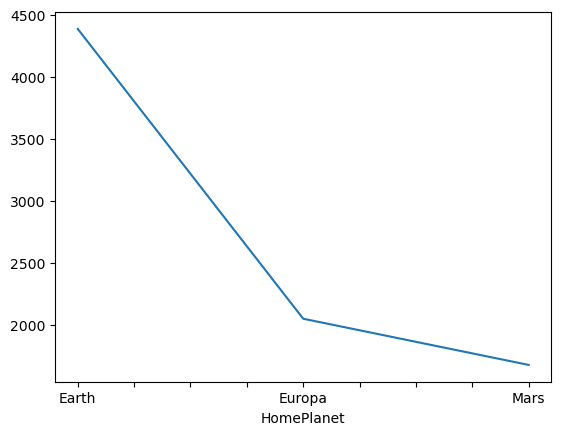

In [31]:
df["HomePlanet"].value_counts().plot().bar()

In [32]:
df["HomePlanet"] = df["HomePlanet"].astype(str)

In [33]:
df[["HomePlanet"]] = most_frequent_imputer.fit_transform(df[["HomePlanet"]])

In [34]:
df.isnull().sum()

PassengerId        0
HomePlanet         0
CryoSleep        215
Cabin           6655
Destination      179
Age              974
VIP              199
RoomService        0
FoodCourt          0
ShoppingMall     204
Spa              180
VRDeck           186
Name             199
Transported        0
dtype: int64

In [35]:
df.isnull().sum()

PassengerId        0
HomePlanet         0
CryoSleep        215
Cabin           6655
Destination      179
Age              974
VIP              199
RoomService        0
FoodCourt          0
ShoppingMall     204
Spa              180
VRDeck           186
Name             199
Transported        0
dtype: int64

<Axes: ylabel='Frequency'>

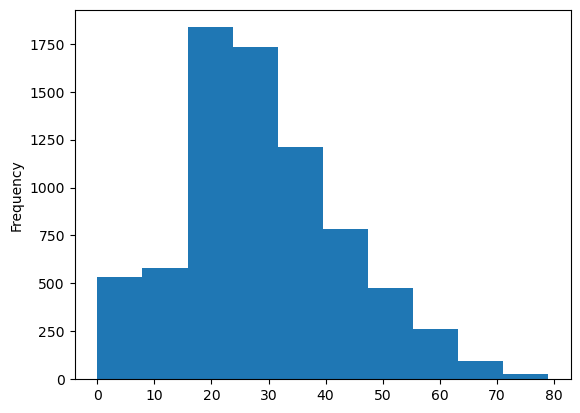

In [36]:
df["Age"].plot.hist()

In [37]:
mean_imputer = SimpleImputer(strategy="mean")

In [38]:
df["Age"].isnull().sum()

np.int64(974)

In [39]:
df[["Age"]] = mean_imputer.fit_transform(df[["Age"]])

<Axes: ylabel='Frequency'>

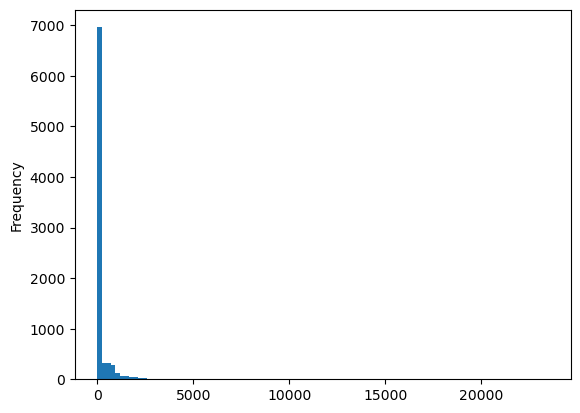

In [40]:
df["ShoppingMall"].plot.hist(bins=100)

In [41]:
df["ShoppingMall"].mean().item()

173.41911410688493

In [44]:
df["ShoppingMall"].median()

0.0

In [45]:
df["ShoppingMall"].mode().item()

0.0

In [46]:
df[["VRDeck, Spa"]].plot.hist(subplots=True)

KeyError: "None of [Index(['VRDeck, Spa'], dtype='object')] are in the [columns]"

array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
      dtype=object)

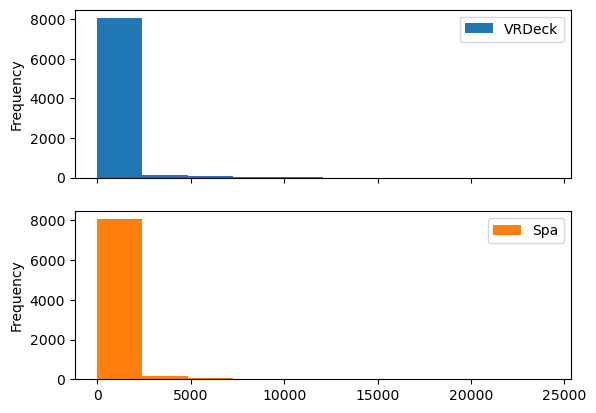

In [47]:
df[["VRDeck", "Spa"]].plot.hist(subplots=True)

In [48]:
min_max_scaler = MinMaxScaler()

In [49]:
scaled_data = min_max_scaler.fit_transform(df[["VRDeck", "Spa"]])

In [50]:
knn_imputer = KNNImputer(n_neighbors=5)

In [54]:
imputed_data = knn_imputer.fit_transform(scaled_data)

In [55]:
imputed_data = min_max_scaler.inverse_transform(imputed_data)

In [56]:
df[["VRDeck", "Spa"]] = imputed_data

In [57]:
df.isnull().sum()

PassengerId        0
HomePlanet         0
CryoSleep        215
Cabin           6655
Destination      179
Age                0
VIP              199
RoomService        0
FoodCourt          0
ShoppingMall     204
Spa                0
VRDeck             0
Name             199
Transported        0
dtype: int64

<Axes: >

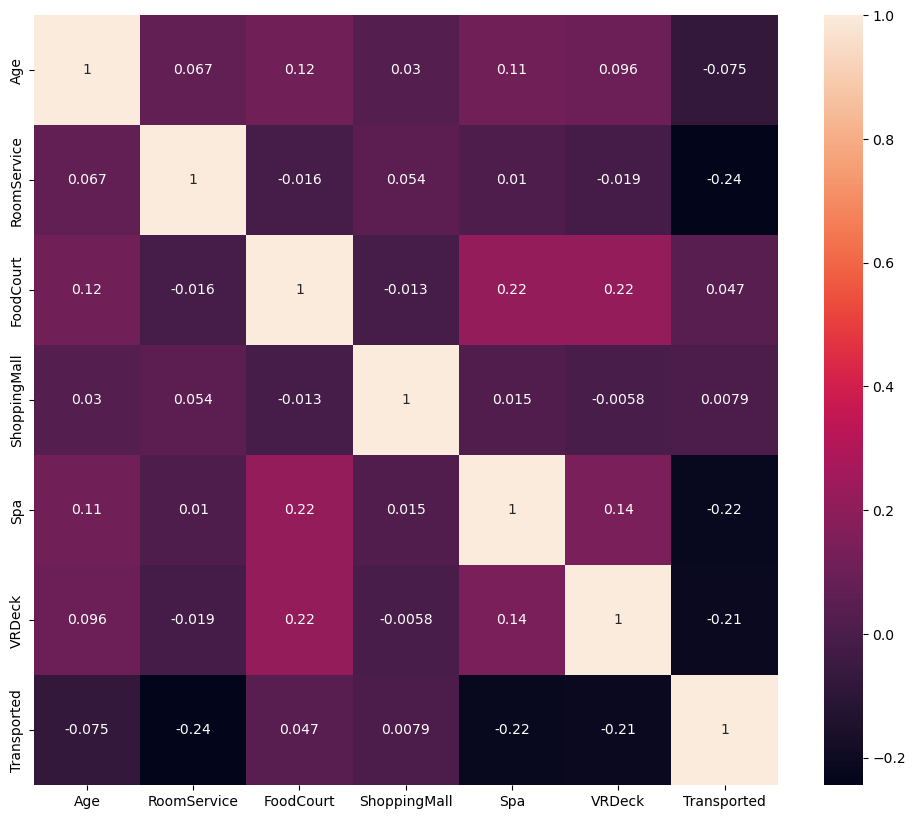

In [58]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [59]:
iterative_imputer = IterativeImputer()

In [60]:
imputed_data = iterative_imputer.fit_transform(df[["VRDeck", "FoodCourt", "Spa"]])

In [61]:
df[["VRDeck", "FoodCourt", "Spa"]] = imputed_data

In [62]:
df = pd.read_csv("air_quality_missing.csv")

In [63]:
df.head()

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,1/1/2017 0:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,NaN,0.002,1.2,73.0,57.0
1,1/1/2017 1:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,NaN,0.002,1.2,71.0,59.0
2,1/1/2017 2:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,NaN,0.002,1.2,70.0,59.0
3,1/1/2017 3:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,NaN,0.002,1.2,NaN,58.0
4,1/1/2017 4:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.003,NaN,0.002,1.2,NaN,61.0


In [64]:
df.tail()

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
647506,12/31/2019 19:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.028,0.013,NaN,23.0,17.0
647507,12/31/2019 20:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.025,0.015,NaN,25.0,19.0
647508,12/31/2019 21:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.023,0.015,NaN,24.0,17.0
647509,12/31/2019 22:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.040,0.004,NaN,25.0,18.0
647510,12/31/2019 23:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.037,0.005,NaN,27.0,18.0


In [65]:
df.isnull().sum()

Measurement date      0
Station code          0
Address               0
Latitude              0
Longitude             0
SO2                  74
NO2                  90
O3                   75
CO                  114
PM10                 95
PM2.5                78
dtype: int64

In [66]:
df["CO"] = df["CO"].ffill()

In [ ]:
df.descr